В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне.

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра density=True, для старых версий matplotlib normed=True).

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

Выбрано: **Логнормальное распределение**
https://wiki.sc/wikipedia/%D0%9B%D0%BE%D0%B3%D0%BD%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.lognorm.html

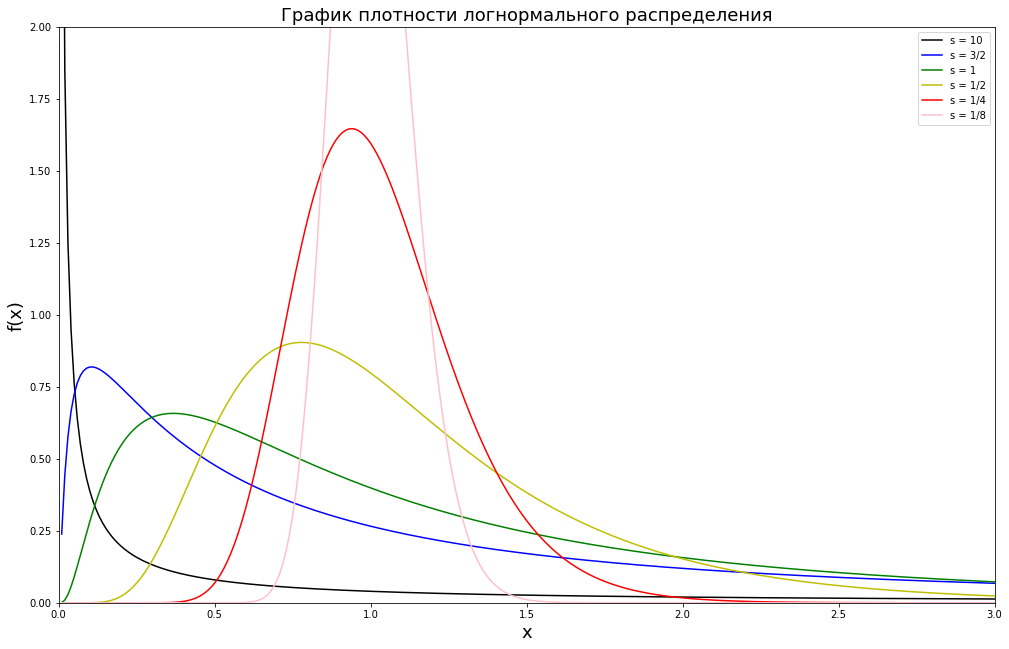

In [16]:
#Python 3
#Построим графики выбранного распределения с разными значениями параметра s:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import lognorm
from scipy.stats import norm

x = np.arange(0.01, 10 , 0.01)

fig = plt.figure(figsize = (13,8))
axes1 = fig.add_axes([0, 0, 1, 1])
axes1.plot(x, lognorm.pdf(x, 10), 'black', label = 's = 10')
axes1.plot(x, lognorm.pdf(x, 3/2), 'b', label = 's = 3/2')
axes1.plot(x, lognorm.pdf(x, 1), 'g', label = 's = 1')
axes1.plot(x, lognorm.pdf(x, 1/2), 'y', label = 's = 1/2')
axes1.plot(x, lognorm.pdf(x, 1/4), 'r', label = 's = 1/4')
axes1.plot(x, lognorm.pdf(x, 1/8), 'pink', label = 's = 1/8')
axes1.set_ylim(0, 2)
axes1.set_xlim(0, 3)
plt.xlabel('x', fontsize = 18)
plt.ylabel('f(x)', fontsize = 18) 
plt.title('График плотности логнормального распределения', fontsize = 18) 
plt.legend()
plt.show()



Затем выберем s = 1/2, cгенерируем из распределения выборку объёма 1000 и построим гистограмму выборки.
Также нанесём график плотности распределения:

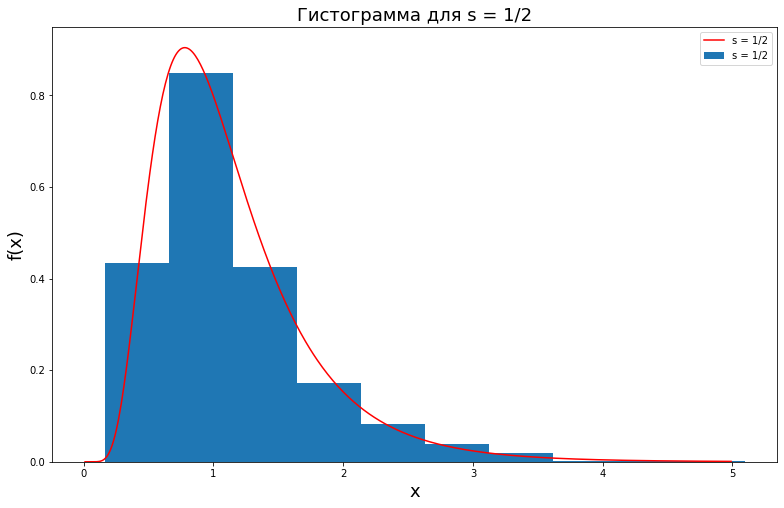

In [20]:
s = 1/2
x = np.arange(0.01, 5 , 0.01)
#сформируем необходимое количество случайных событий
r = lognorm.rvs(s,size = 1000)

fig = plt.figure(figsize = (13,8))
plt.hist(r, density=True, label = 's = 1/2')
plt.plot(x, lognorm.pdf(x,s), 'r', label = 's = 1/2')
plt.xlabel('x', fontsize = 18)
plt.ylabel('f(x)', fontsize = 18) 
plt.title('Гистограмма для s = 1/2', fontsize = 18) 
plt.legend()
plt.show()

Далее оценим распределение выборочного среднего нашей случайной величины при разных объёмах выборок. Для этого при трёх значениях n (5, 10, 50) сгенерируем 1000 выборок объёма n и построим гистограммы распределений их выборочных средних.Поверх каждой гистограммы нарисуем плотность соответствующего нормального распределения. Также, посчитаем значения параметров нормальных распределений.

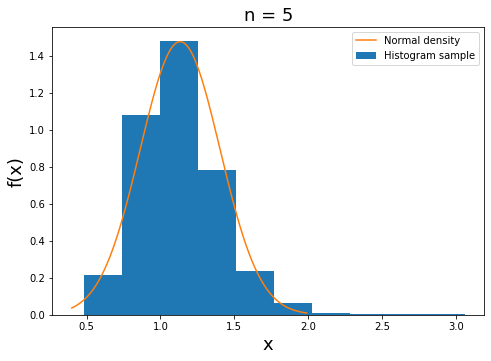

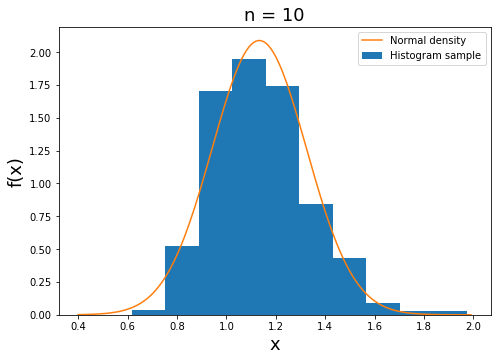

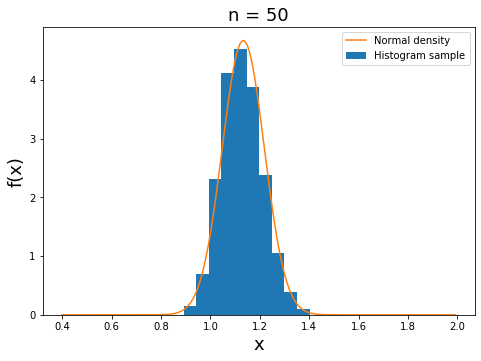

In [27]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import lognorm
from scipy.stats import norm

s = 1/2
n = [5, 10, 50]
x = np.arange(0.01, 5 , 0.01)
xnorm = np.arange(0.4, 2 , 0.01)

#сформируем необходимое количество случайных событий: 
r1 = lognorm.rvs(s,size = (1000,n[0]))
r2 = lognorm.rvs(s,size = (1000,n[1]))
r3 = lognorm.rvs(s,size = (1000,n[2]))
#Усредним и получим 1000 средних:
means1 = r1.mean(axis = 1)
means2 = r2.mean(axis = 1)
means3 = r3.mean(axis = 1)

#функция расчета мат.ожидания
def mo(o,u):
    return np.exp((u + o**2)/2)

E = mo(1/2,0)#теоретическое мат.ожидание
var = lognorm.var(1/2)#теоретическая дисперсия
#применяем ЦПТ:
E_norm = E
var_norm1 = var/n[0]
var_norm2 = var/n[1]
var_norm3 = var/n[2]
#Зададим нормальное распределение:
r1_norm = norm(E_norm, var_norm1**0.5 )
r2_norm = norm(E_norm, var_norm2**0.5 )
r3_norm = norm(E_norm, var_norm3**0.5 )

fig = plt.figure()
axes1 = fig.add_axes([0, 0, 1, 1])
axes1.hist(means1, density=True, label = 'Histogram sample')
axes1.plot(xnorm, r1_norm.pdf(xnorm), label = 'Normal density')
axes1.set_xlabel('x', fontsize = 18)
axes1.set_ylabel('f(x)', fontsize = 18)
axes1.set_title('n = 5', fontsize = 18)
axes1.legend()

fig = plt.figure()
axes2 = fig.add_axes([0, 0, 1, 1])
axes2.hist(means2, density=True, label = 'Histogram sample')
axes2.plot(xnorm, r2_norm.pdf(xnorm), label = 'Normal density')
axes2.set_xlabel('x', fontsize = 18)
axes2.set_ylabel('f(x)', fontsize = 18)
axes2.set_title('n = 10', fontsize = 18)
axes2.legend()

fig = plt.figure()
axes3 = fig.add_axes([0, 0, 1, 1])
axes3.hist(means3, density=True, label = 'Histogram sample')
axes3.plot(xnorm, r3_norm.pdf(xnorm), label = 'Normal density')
axes3.set_xlabel('x', fontsize = 18)
axes3.set_ylabel('f(x)', fontsize = 18)
axes3.set_title('n = 50', fontsize = 18)
axes3.legend()

plt.legend()

plt.show()

Распределение выборочных средних достаточно хорошо описывается нормальным распределением, что является утверждением центральной предельной теоремы. При увеличении объема каждой из выборок, мы наблюдаем увеличение точности аппроксимации.